# Árbol de dececision

Importa librerías

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import tree
from sklearn.model_selection import cross_val_score
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

Cargar CSV

In [22]:
df = pd.read_csv("datasets/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5


Análisis exploratorio de los datos

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [24]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,"1,599.00","1,599.00","1,599.00","1,599.00","1,599.00","1,599.00","1,599.00","1,599.00","1,599.00","1,599.00","1,599.00","1,599.00"
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


In [25]:
df.shape

(1599, 12)

In [26]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Gráficas

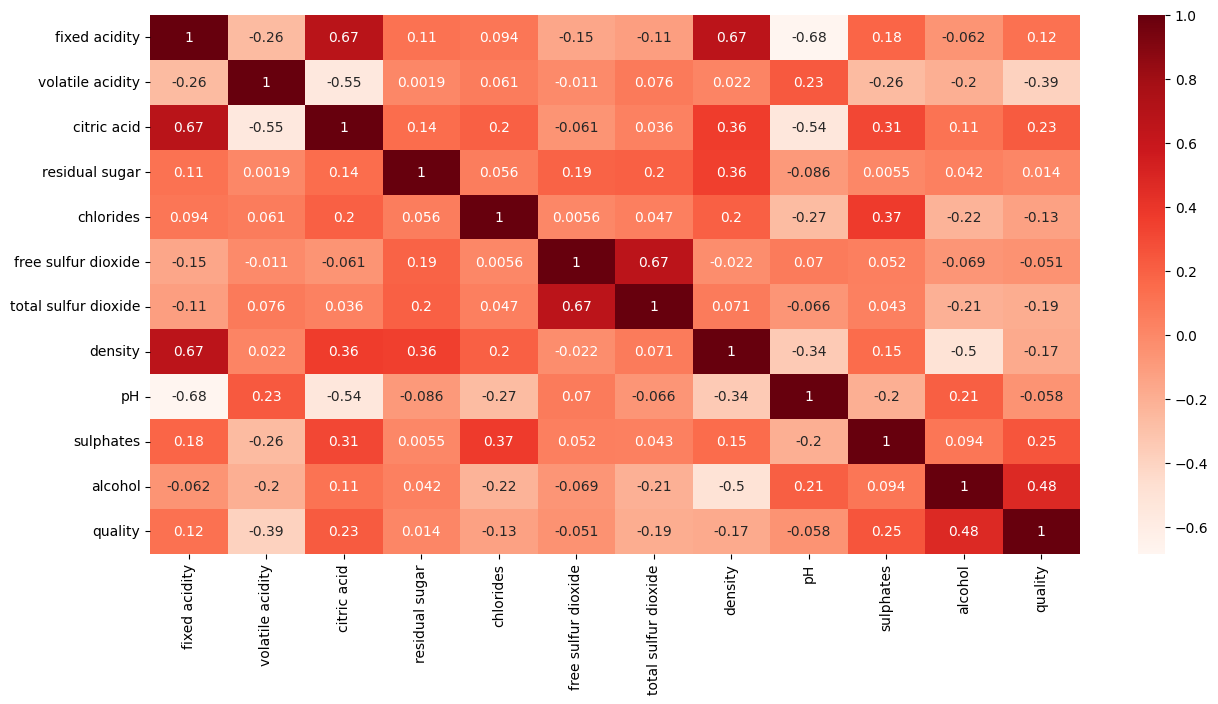

In [27]:
plt.figure(figsize=(15,7))
correlation = (df.corr())
sns.heatmap(correlation,annot=True,cmap='Reds')
plt.show()

## Preparando variables

In [28]:
scaler = MinMaxScaler(feature_range=(0, 1))
df2 = scaler.fit_transform(df)
df2 = pd.DataFrame(df2, columns = df.columns)
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.25,0.40,0.00,0.07,0.11,0.14,0.10,0.57,0.61,0.14,0.15,0.40
1,0.28,0.52,0.00,0.12,0.14,0.34,0.22,0.49,0.36,0.21,0.22,0.40
2,0.28,0.44,0.04,0.10,0.13,0.20,0.17,0.51,0.41,0.19,0.22,0.40
3,0.58,0.11,0.56,0.07,0.11,0.23,0.19,0.58,0.33,0.15,0.22,0.60
4,0.25,0.40,0.00,0.07,0.11,0.14,0.10,0.57,0.61,0.14,0.15,0.40


In [29]:
df["vino_de_calidad"] = ["Si" if i >= 7 else "No" for i in df['quality']]
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,vino_de_calidad
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,No
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5,No
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5,No
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6,No
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,No


## Train y Test

In [30]:
X = df2.drop(["quality"], axis = 1)
y = df["vino_de_calidad"]

In [31]:
y.value_counts()

vino_de_calidad
No    1382
Si     217
Name: count, dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2323, stratify=y)

In [33]:
X_train.shape

(1279, 11)

In [34]:
X_test.shape

(320, 11)

## Modelo

In [35]:
dt = DecisionTreeClassifier(random_state=2323)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2323)

In [36]:
prediccion = dt.predict(X_test)
prediccion

array(['No', 'No', 'No', 'No', 'Si', 'Si', 'No', 'No', 'No', 'Si', 'No',
       'No', 'No', 'Si', 'No', 'No', 'No', 'No', 'No', 'Si', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Si', 'No', 'No', 'No', 'Si', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Si', 'Si', 'No', 'No', 'No',
       'No', 'Si', 'No', 'No', 'No', 'No', 'No', 'Si', 'No', 'Si', 'No',
       'No', 'No', 'Si', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Si', 'No', 'Si', 'No', 'No', 'No', 'No', 'Si', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Si', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Si', 'No', 'No', 'No', 'Si', 'No',
       'No', 'No', 'No', 'Si', 'No', 'No', 'Si', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'N

## Validación del modelo

In [37]:
print("Precisión del modelo", accuracy_score(y_test,prediccion) * 100, '%')

Precisión del modelo 83.4375 %


In [38]:
confusion_matrix(y_test,prediccion)

array([[246,  31],
       [ 22,  21]])

<Axes: >

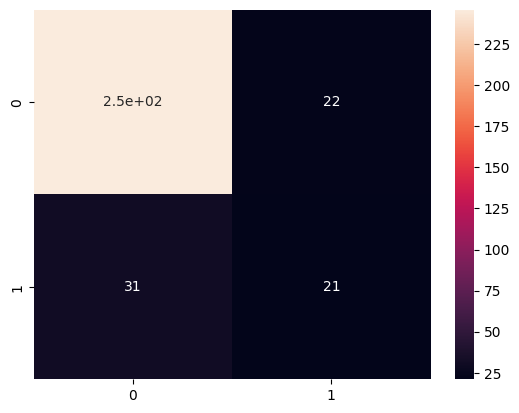

In [39]:
sns.heatmap(confusion_matrix(prediccion,y_test),annot=True)

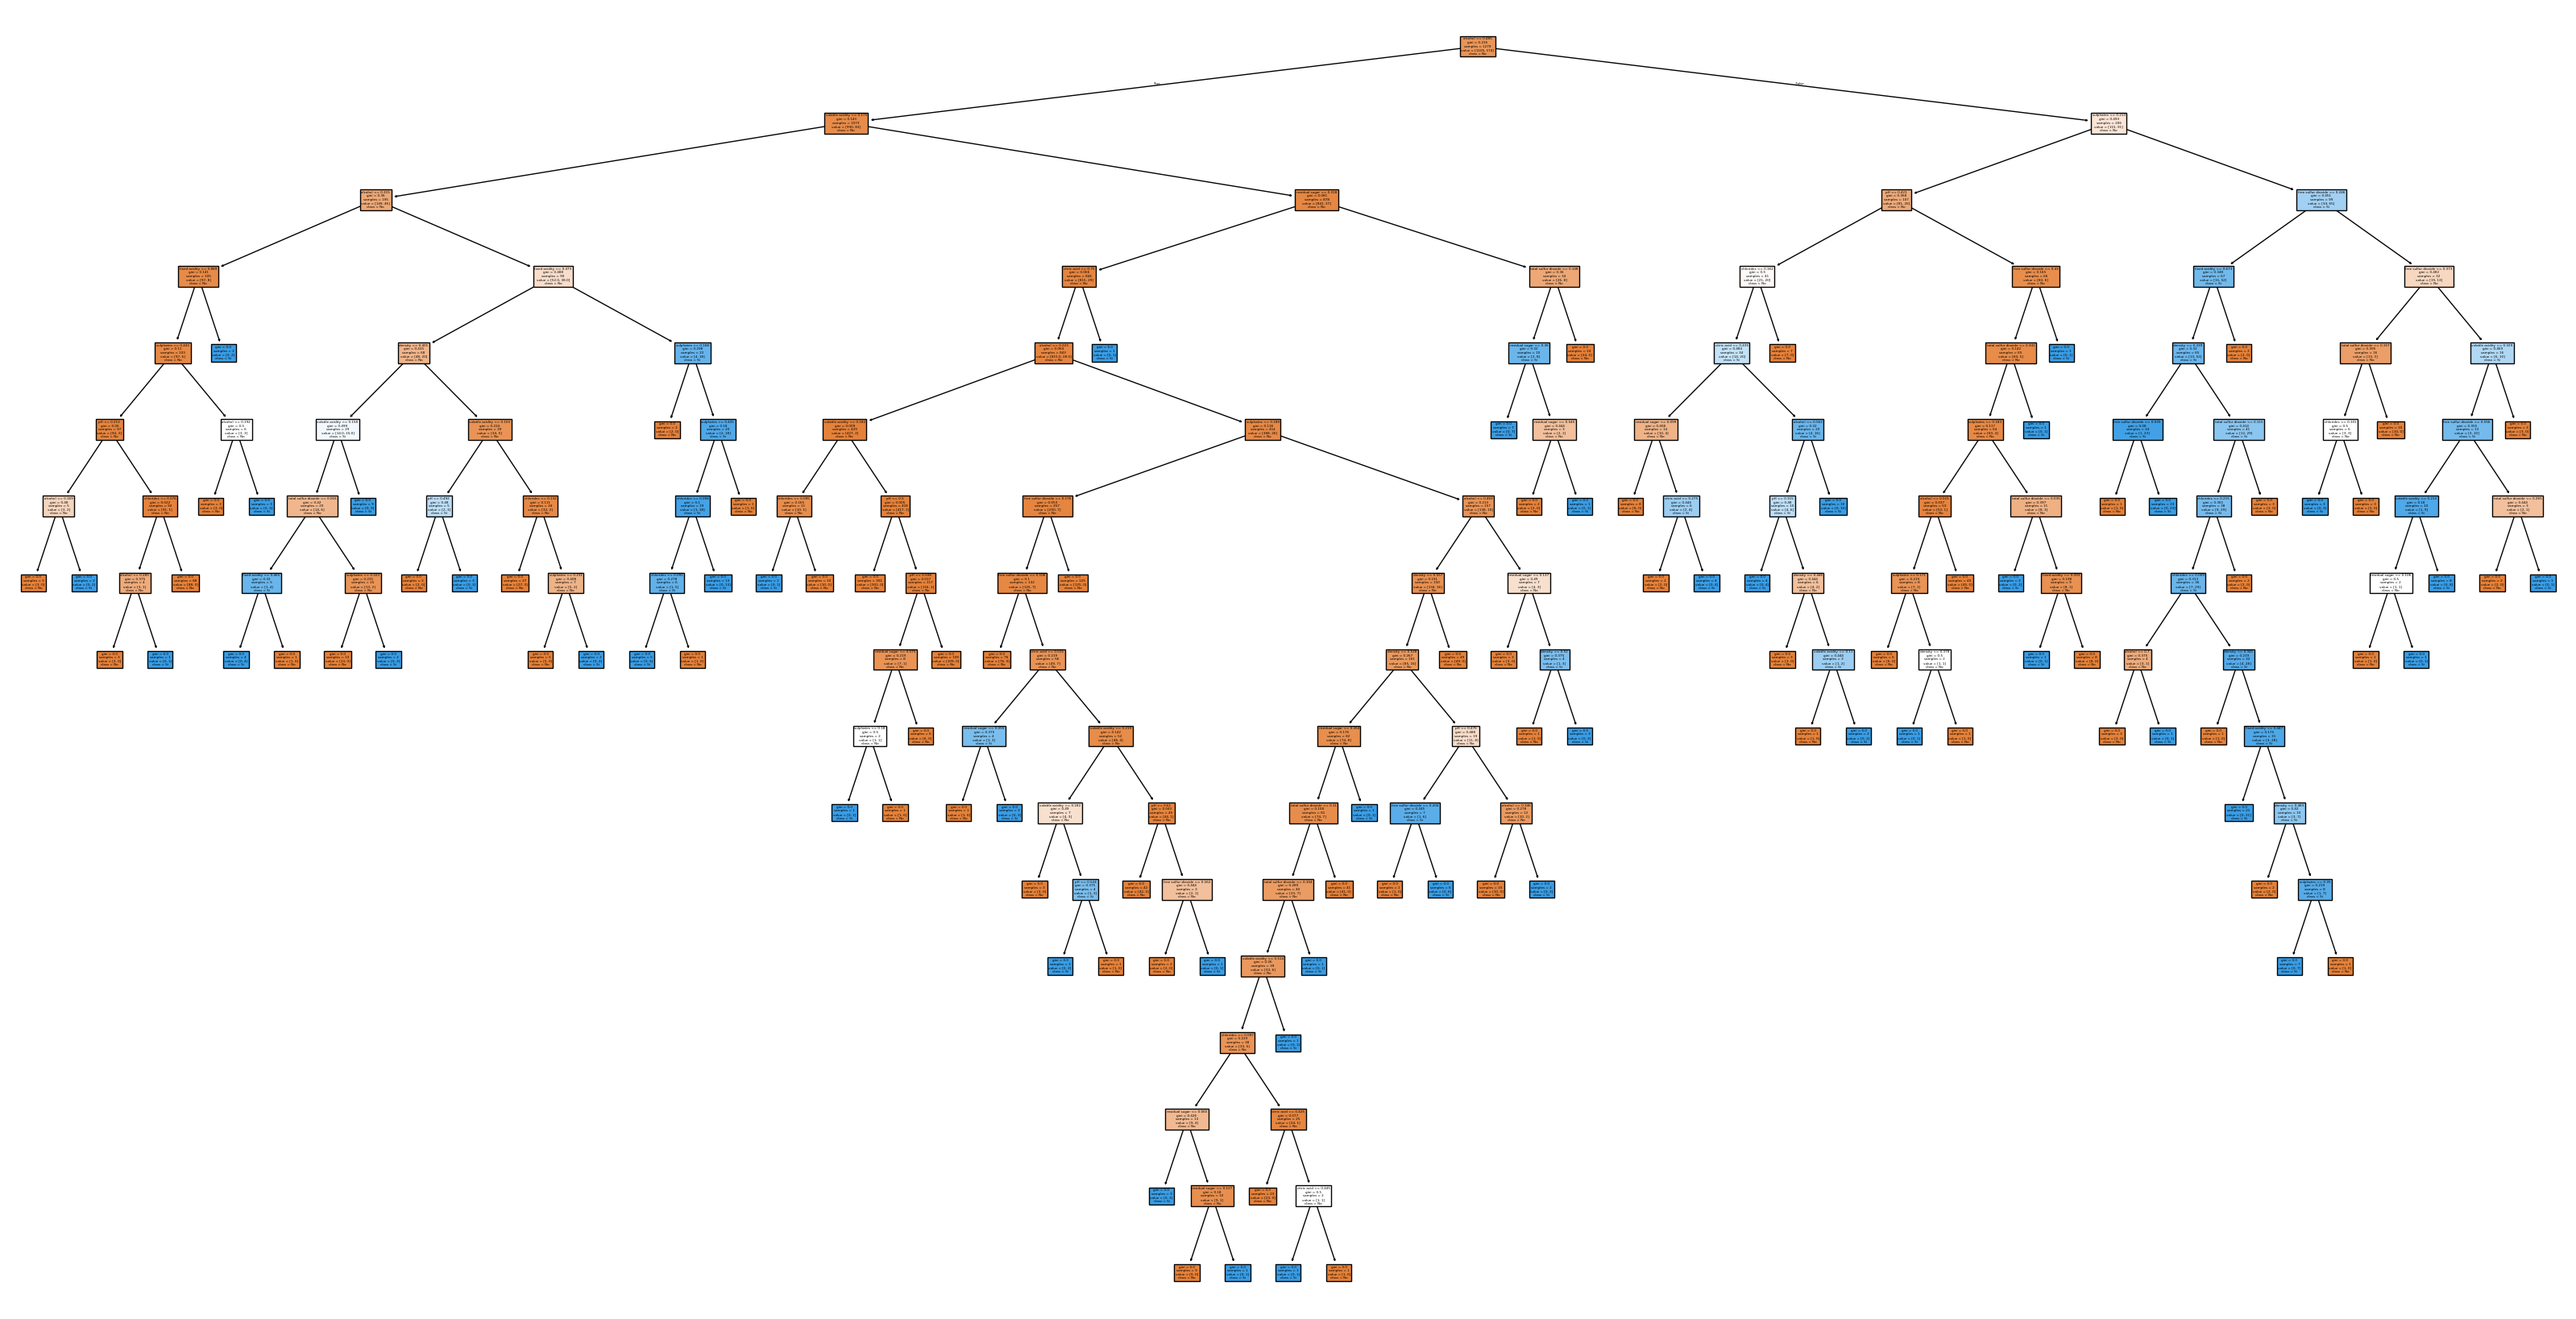

In [44]:
plt.figure(figsize=(41,21))
fn = X.columns
cn = y.unique()
tree.plot_tree(dt, feature_names=fn, class_names=cn, filled=True)
plt.show()

In [50]:
scores = cross_val_score(dt, X, y, cv=5)
print("Validación Cruzada: ",scores.mean())

Validación Cruzada:  0.8023667711598745


In [48]:
y_pred_train = dt.predict(X_train)
print(accuracy_score(y_train, y_pred_train))

1.0


## Hyperparámetros

In [52]:
dt_new = DecisionTreeClassifier(criterion = "gini",
                                max_depth = 2,
                                max_features = 8,
                                random_state = 2020)
dt_new.fit(X_train, y_train)
y_pred_new = dt_new.predict(X_test)
print("Precisión del modelo: ", accuracy_score(y_test, y_pred_new))
scores = cross_val_score(dt_new, X, y, cv=5)
print("Validación Cruzada: ",scores.mean())

Precisión del modelo:  0.88125
Validación Cruzada:  0.8786794670846394


Después de modificar algunos parámetros, vemos que el modelo mejora de 83% a 88%

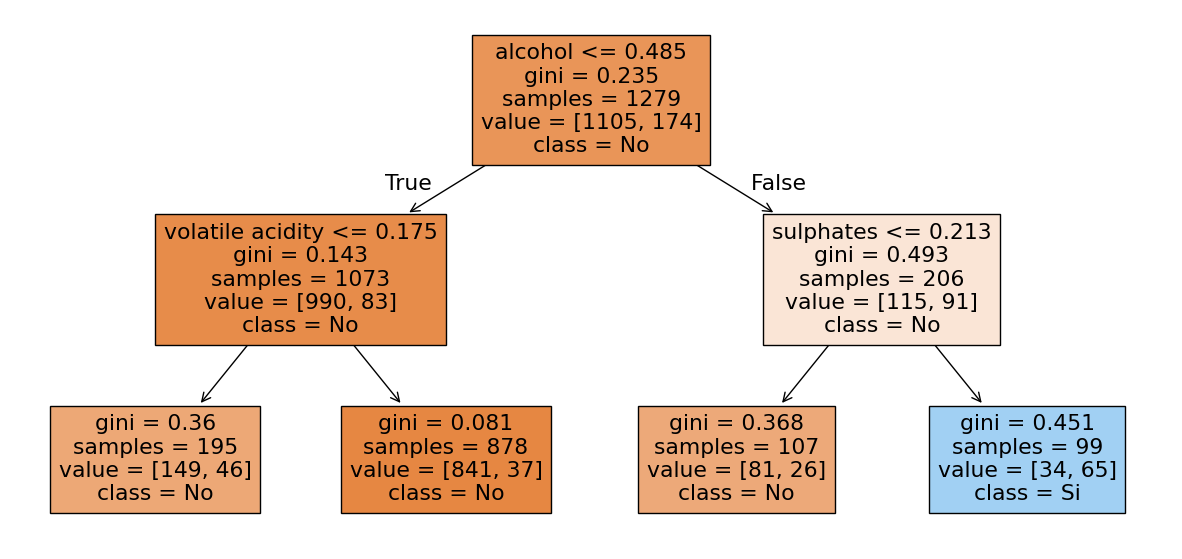

In [54]:
plt.figure(figsize=(15,7))
tree.plot_tree(dt_new, feature_names=fn, class_names=cn, filled=True)
plt.show()

Vemos que hay 3 variables dominantes: alcohol, volatile acidity, and sulphates